# Computing derivatives with Fourier transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deft

### Computing the gradient

The gradient of a function and its Fourier transform are related by

\begin{equation}
\nabla w(\mathbf{r}) \xrightarrow[\text{Fourier transform}]{} i \mathbf{k} \tilde{w}(\mathbf{k}) .
\end{equation}

The following code uses DEFT to compute the gradient of $w(\mathbf{r}) = \cos(4\pi x)$, defined on a simple cubic lattice with unit spacing. The result should be $-4\pi\sin(4\pi x)$ along the $x$-direction and zero along the $y$- and $z$- directions.

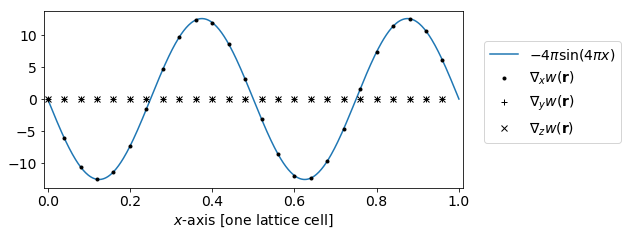

In [2]:
# create f(r) = cos(4*pi*x) on grid
grd_pts = 25
data = np.zeros([grd_pts, grd_pts, grd_pts])
for i in range(grd_pts):
    data[i,:,:] = np.cos(4.0*np.pi*float(i)/grd_pts)

# compute gradients
ax = [1.0,0.0,0.0];  ay = [0.0,1.0,0.0];  az = [0.0,0.0,1.0]
grad_x = deft.compute_gradient(data, 'x', ax, ay, az)
grad_y = deft.compute_gradient(data, 'y', ax, ay, az)
grad_z = deft.compute_gradient(data, 'z', ax, ay, az)

# plot
x = np.linspace(0,1,500)
plt.rc('font', size=14)
fig = plt.figure(figsize=[9,3.5])
plt.plot(x, -4.0*np.pi*np.sin(4.0*np.pi*x))
plt.plot(np.arange(grd_pts)/grd_pts, grad_x[:,0,0], '.k')
plt.plot(np.arange(grd_pts)/grd_pts, grad_y[:,0,0], '+k')
plt.plot(np.arange(grd_pts)/grd_pts, grad_z[:,0,0], 'xk')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$-axis [one lattice cell]')
plt.legend(['$-4\pi\sin(4\pi x)$', '$\\nabla_x w(\mathbf{r})$', '$\\nabla_y w(\mathbf{r})$', '$\\nabla_z w(\mathbf{r})$'], loc=(1.05,0.25))
plt.tight_layout()
plt.show()

### Computing the Laplacian

The Laplacian of a function and its Fourier transform are related by

\begin{equation}
\nabla^2 w(\mathbf{r})
\xrightarrow[\text{Fourier transform}]{} 
- k^2 \tilde{w}(\mathbf{k}) .
\end{equation}

The following code uses DEFT to compute the Laplacian of $w(\mathbf{r}) = \cos(4\pi x)$, defined on a simple cubic lattice with unit spacing. The result should be $-16\pi^2\cos(4\pi x)$.

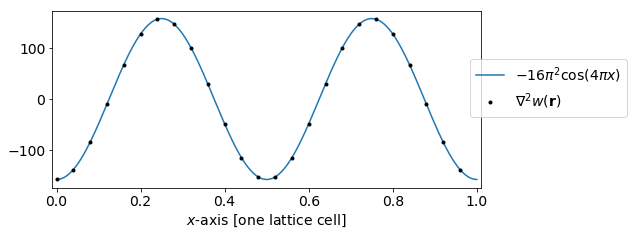

In [3]:
# create f(r) = cos(4*pi*x) on grid
grd_pts = 25
data = np.zeros([grd_pts, grd_pts, grd_pts])
for i in range(grd_pts):
    data[i,:,:] = np.cos(4.0*np.pi*float(i)/grd_pts)

# compute laplacian
ax = [1.0,0.0,0.0];  ay = [0.0,1.0,0.0];  az = [0.0,0.0,1.0]
lapl = deft.compute_laplacian(data, ax, ay, az)

# plot
x = np.linspace(0,1,500)
plt.rc('font', size=14)
fig = plt.figure(figsize=[9,3.5])
plt.plot(x, -16.0*np.pi**2*np.cos(4.0*np.pi*x))
plt.plot(np.arange(grd_pts)/grd_pts, lapl[:,0,0], '.k')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$-axis [one lattice cell]')
plt.legend(['$-16\pi^2\cos(4\pi x)$', '$\\nabla^2 w(\mathbf{r})$'], loc=(0.975,0.4))
plt.tight_layout()
plt.show()